# Overview of the Problem
```
Fraud is one of the major issues we come up majorly in banks, life insurance, health insurance, and many others. These major frauds are dependent on the person who is trying to sell you the fake product or service, if you are matured enough to decide what is wrong then you will never get into any fraud transactions. But one such fraud that has been increasing a lot these days is fraud in making payments.  I will biuld a fraud detection with machine learning
```

# About Dataset
The dataset that I am using is transaction data for online purchases collected from an e-commerce retailer. The dataset contains more than 39000 transactions, each transaction contains 5 features that will describe the nature of the transactions.

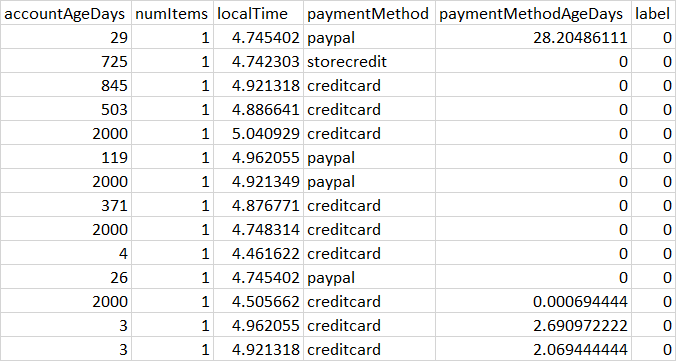


In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#loading dataset
df = pd.read_csv(r'C:\Users\...\Documents\Fraud Detection.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
print('Dimensions of dataset{}'.format(df.shape))

Dimensions of dataset(39221, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


As payment methods are catagorical variable we have to change it into numerical variable in order to apply classification model.
We will use label encoder for that

In [6]:
df['paymentMethod'].value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
Label_ = LabelEncoder()
convert = Label_.fit_transform(df['paymentMethod'])
df = df.drop('paymentMethod', axis='columns')
df['paymentMethod'] = convert
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod
0,29,1,4.745402,28.204861,0,1
1,725,1,4.742303,0.000000,0,2
2,845,1,4.921318,0.000000,0,0
3,503,1,4.886641,0.000000,0,0
4,2000,1,5.040929,0.000000,0,0


Fortunately, the dataset I am using is already structured very well with no missing values in it, and I don’t find any scope of data cleaning in it. So without wasting any time, I will dive into building our machine learning model.

Now, I will split the data into training and test sets:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.33, random_state=17)

In [9]:
X_train.shape

(26278, 5)

In [10]:
X_test.shape

(12943, 5)

As this is a problem of binary classification, I will use a Logistic Regression algorithm, as it is one of the most powerful algorithms for a binary classification model. If you don’t know what Binary Classification means, you can learn it from here. Now let’s simply train the fraud detection model using logistic regression algorithm and have a look at the accuracy score that we will get by using this algorithm

In [11]:
clf = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

1.0


Our fraud detection model gave an accuracy of 100 per cent by using the logistic regression algorithm.

In [13]:
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]


So out of all the transaction in the dataset,190 transactions are correctly recognized as fraud, and 12753 transactions are recognized as not fraudulent transactions.